In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/Pitt-311-data.csv', parse_dates=['CREATED_ON'], dtype={'REQUEST_ID': 'Int64'})
df

,_id,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
0,1,203364,2017-12-15 14:53:00,Street Obstruction/Closure,Call Center,1,DOMI - Permits,Central Northside,1.0,22.0,4.200322e+10,1.0,22.0,1.0,1-7,-80.016716,40.454144,EXACT
1,2,200800,2017-11-29 09:54:00,Graffiti,Control Panel,1,Police - Zones 1-6,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,-79.969952,40.429243,APPROXIMATE
2,3,201310,2017-12-01 13:23:00,Litter,Call Center,1,DPW - Street Maintenance,Troy Hill,1.0,24.0,4.200324e+10,1.0,24.0,1.0,1-2,-79.985859,40.459716,EXACT
3,4,200171,2017-11-22 14:54:00,Water Main Break,Call Center,1,Pittsburgh Water and Sewer Authority,Banksville,2.0,20.0,4.200320e+10,5.0,20.0,6.0,4-9,-80.034210,40.406969,EXACT
4,5,193043,2017-10-12 12:46:00,Guide Rail,Call Center,1,DPW - Construction Division,East Hills,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-19,-79.876582,40.451226,EXACT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680096,827877,700801,2022-12-21 17:47:00,Police - Submit a Tip,Website,0,Police - Zones 1-6,Garfield,9.0,10.0,4.200310e+10,2.0,10.0,5.0,3-4,-79.938182,40.466230,APPROXIMATE
680097,827878,700802,2022-12-21 17:50:00,Patrol,Call Center,0,Police - Zones 1-6,Morningside,7.0,10.0,4.200310e+10,2.0,10.0,5.0,3-7,-79.923957,40.486786,APPROXIMATE
680098,827879,700803,2022-12-21 17:51:00,"ADA Ramp, Installation",Website,0,DOMI - Streets,Shadyside,8.0,7.0,4.200307e+10,2.0,7.0,4.0,3-11,-79.929323,40.457669,APPROXIMATE
680099,827880,700804,2022-12-21 17:53:00,Bike Lane Bollard,Call Center,0,DPW - Construction Division,Shadyside,8.0,7.0,4.200307e+10,2.0,7.0,4.0,3-11,-79.925178,40.457374,EXACT


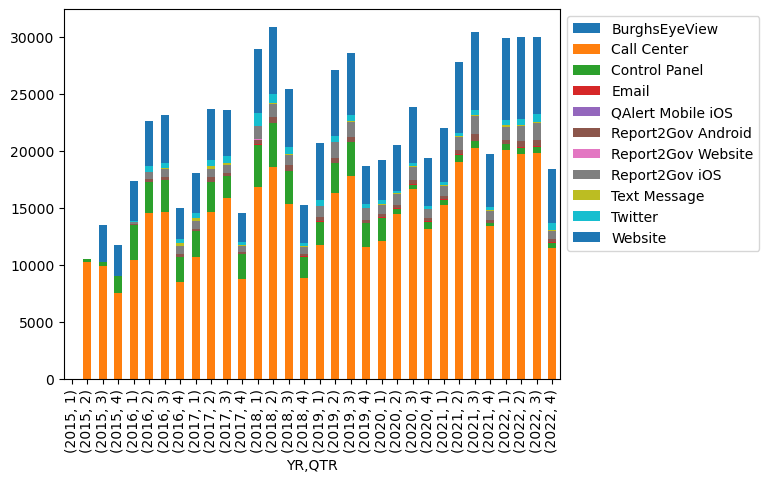

In [3]:
df['YR'] = df['CREATED_ON'].dt.year
df['QTR'] =df['CREATED_ON'].dt.quarter
call_counts_df = df.loc[:, ['YR', 'QTR', 'REQUEST_ORIGIN']]
call_counts_per_qtr_df = (
    call_counts_df.value_counts().unstack(level=2, fill_value=0)
)
call_counts_per_qtr_df.plot(kind='bar', stacked=True).legend(bbox_to_anchor=(1.0, 1.0))

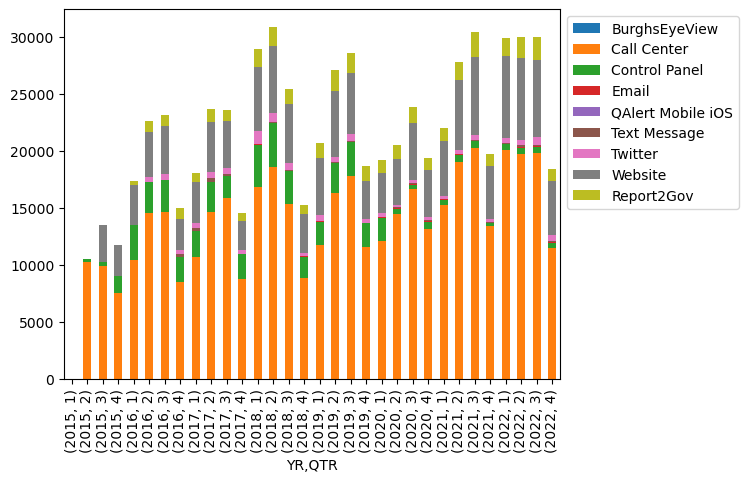

In [4]:
r2gs = [
    x for x in call_counts_per_qtr_df.columns.tolist()
    if x.startswith('Report2Gov')]
call_counts_per_qtr_df['Report2Gov'] = (
        call_counts_per_qtr_df[r2gs[0]] + call_counts_per_qtr_df[r2gs[1]]
        + call_counts_per_qtr_df[r2gs[2]]
)
agg_r2g_call_counts_per_qtr_df = (
    call_counts_per_qtr_df.drop(r2gs, axis=1)
)
agg_r2g_call_counts_per_qtr_df.plot(
    kind='bar', stacked=True).legend(bbox_to_anchor=(1.0, 1.0)
)



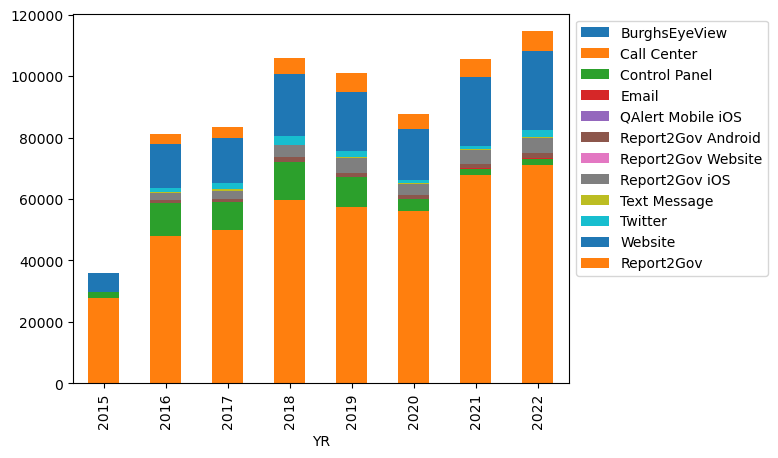

In [5]:
call_counts_per_yr_df = (
    call_counts_per_qtr_df
     .reset_index().drop('QTR', axis=1).groupby('YR').sum()
)
call_counts_per_yr_df.plot(
    kind='bar', stacked=True).legend(bbox_to_anchor=(1.0, 1.0))
    

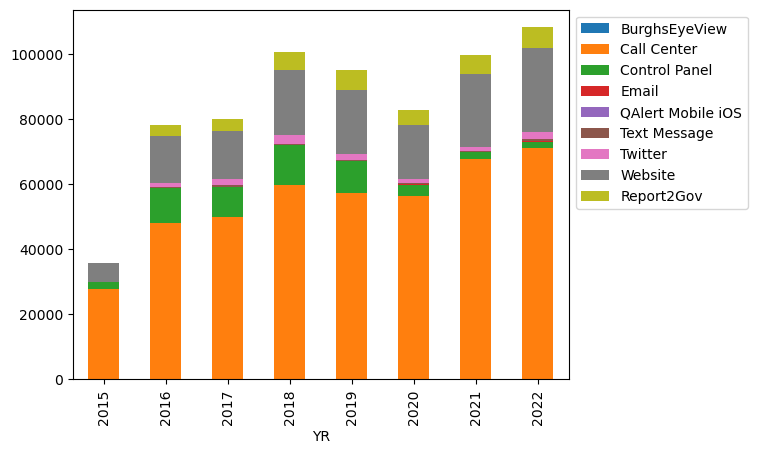

In [6]:
agg_r2g_call_counts_per_yr_df = (
    agg_r2g_call_counts_per_qtr_df
     .reset_index().drop('QTR', axis=1).groupby('YR').sum()
)
agg_r2g_call_counts_per_yr_df.plot(
    kind='bar', stacked=True).legend(bbox_to_anchor=(1.0, 1.0))

In [7]:
def season(dt):
    return 'Spring' if 4 <= dt.month <= 9 else 'Winter'

df['Season'] = df['CREATED_ON'].apply(season)
df['Season'].value_counts()
rt_by_season_counts = df.loc[:, ['Season', 'REQUEST_TYPE']].value_counts().reset_index()
rt_by_season_counts.query('Season == "Spring"')

,Season,REQUEST_TYPE,count
0,Spring,Weeds/Debris,47213
1,Spring,Potholes,38319
4,Spring,Referral,15644
6,Spring,Building Maintenance,13693
9,Spring,Abandoned Vehicle (parked on street),10792
...,...,...,...
715,Spring,Snow Angel - Thank You,1
718,Spring,Sidewalk,1
720,Spring,Scoobi/Scooter Parking,1
722,Spring,Robots,1


In [8]:
rt_by_season_counts.query('Season == "Winter"')

,Season,REQUEST_TYPE,count
2,Winter,Snow/Ice removal,31676
3,Winter,Potholes,28238
5,Winter,Referral,13941
7,Winter,Weeds/Debris,13671
8,Winter,Building Maintenance,11578
...,...,...,...
719,Winter,Handicapped Parking Sign Request,1
721,Winter,Towed Vehicle/Do Not Use,1
723,Winter,Dumping (Private Property)/DO NOT USE,1
724,Winter,EMT,1
